# Analyse, Classification et Indexation  des Données (ACID)

## (mini-)projet

Noms et prénoms des membres du binôme : 

- ....
- ....

Le but du projet est de mettre en oeuvre la régression linéaire et différentes méthodes de classification vues en cours.

Travail à rendre : ce notebook complété. Quelques cellules sont pré-remplies et donc à exécuter telles quelles. D'autres sont à compléter pour réaliser le travail demandé. 

In [2]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Matplotlib is building the font cache; this may take a moment.


### Data

In [3]:
df = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Available
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,no
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,no
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,no
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,no
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,no


## Partie 1 : Régression Linéaire

Dans un premier temps, nous allons réaliser une régression du prix des voitures en fonction des caractéristiques numériques, et seulement celles-la.  

1. Donnez l'instruction permettant de ne prendre en considération que les champs numériques utilisables pour la régression.

In [4]:
df_numerical = df.select_dtypes(include=np.number)

In [5]:
df_numerical.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


2. Réalisez les régressions linéaires successives jusqu'à obtenir un modèle valable ne prenant en compte que les variables vraiment explicatives.

## Partie 2 : Classification

Le champ **Available** indique si la voiture est disponible à la vente ou non (il s'agit essentiellement de la capacité du fournisseur à fournir ce type de voiture dans un délai raisonnable). On souhaite donc, en faisant abstraction du prix, entrainer un modèle à prédire si la voiture serait disponible dans des délais raisonnables ou non. 

In [45]:
df = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Available
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,no
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,no
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,no
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,no
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,no


1. Exécutez la cellule suivante et observez le résultat. 

In [46]:
from sklearn import preprocessing
columns = df.columns
le = preprocessing.LabelEncoder()
for c in columns:
    le.fit(df[c])
    df[c] = le.transform(df[c])
df

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Available
0,0,5,2,0,1,0,2,0,2,22,...,5,23,4,13,30,10,8,10,118,0
1,1,5,3,0,1,0,2,0,2,22,...,5,23,4,13,30,10,8,10,137,0
2,2,3,1,0,1,2,2,0,10,29,...,5,1,28,13,45,10,6,9,137,0
3,3,4,4,0,0,3,1,0,30,45,...,5,13,25,22,27,16,11,13,123,0
4,4,4,5,0,0,3,0,0,28,45,...,5,13,25,5,33,16,5,5,148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,1,139,0,0,3,2,0,46,63,...,5,35,15,20,32,15,10,11,143,0
201,201,1,138,1,0,3,2,0,46,63,...,5,35,15,11,48,14,6,8,161,0
202,202,1,140,0,0,3,2,0,46,63,...,5,26,7,12,38,16,5,6,165,0
203,203,1,142,1,0,3,2,0,46,63,...,3,6,25,31,28,8,13,10,167,1


2. Testez différents algorithmes de machine learning pour prédire la disponibilité des voitures. Que pensez-vous des résultats obtenus? Expliquez.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Séparation des données en ensembles d'entraînement et de test
X = df.drop(['Available', 'price', 'car_ID'], axis=1)
y = df['Available']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données si nécessaire
X_not_normalized = X_train
scaler = StandardScaler()
scaler.fit(X_not_normalized)
X = scaler.transform(X_not_normalized)

# Entraînement du modèle k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn_model.predict(X_test)

# Évaluation du modèle
confusion = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(confusion)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (k-NN): {accuracy}")

precision = precision_score(y_test, y_pred, average='macro', zero_division=1) # ou 'micro', 'macro', 'weighted' , 'binary'
print(f"Précision : {precision}")

recall = recall_score(y_test,y_pred, average='macro', zero_division=1)
print(f"Rappel : {recall}")

f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
print(f"Score F1 : {f1}")

Matrice de confusion :
[[36  0]
 [ 5  0]]
Accuracy (k-NN): 0.8780487804878049
Précision : 0.9390243902439024
Rappel : 0.5
Score F1 : 0.4675324675324676


In [112]:
from sklearn.naive_bayes import GaussianNB

X = df.drop(['Available', 'price', 'car_ID'], axis=1)
y = df['Available']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entraînement du modèle de Bayes
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_bayes = bayes_model.predict(X_test)

# Évaluation du modèle
confusion = confusion_matrix(y_test, y_pred_bayes)
print("Matrice de confusion :")
print(confusion)


accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Accuracy (Bayesian): {accuracy_bayes}")

precision = precision_score(y_test, y_pred_bayes, average='macro', zero_division=1)
print(f"Précision : {precision}")

recall = recall_score(y_test, y_pred_bayes, average='macro', zero_division=1)
print(f"Rappel : {recall}")

f1 = f1_score(y_test, y_pred_bayes, average='macro', zero_division=1)
print(f"Score F1 : {f1}")

Matrice de confusion :
[[36  0]
 [ 1  4]]
Accuracy (Bayesian): 0.975609756097561
Précision : 0.9864864864864865
Rappel : 0.9
Score F1 : 0.9375951293759514


In [113]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop(['Available', 'price', 'car_ID'], axis=1)
y = df['Available']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entraînement d'un arbre de décision
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_tree = tree_model.predict(X_test)

# Évaluation du modèle
confusion = confusion_matrix(y_test, y_pred_tree)
print("Matrice de confusion :")
print(confusion)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy (Decision Tree): {accuracy_tree}")

precision = precision_score(y_test, y_pred_tree, average='macro', zero_division=1)
print(f"Précision : {precision}")

recall = recall_score(y_test, y_pred_tree, average='macro', zero_division=1)
print(f"Rappel : {recall}")

f1 = f1_score(y_test, y_pred_tree, average='macro', zero_division=1)
print(f"Score F1 : {f1}")

Matrice de confusion :
[[36  0]
 [ 0  5]]
Accuracy (Decision Tree): 1.0
Précision : 1.0
Rappel : 1.0
Score F1 : 1.0


In [114]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['Available', 'price', 'car_ID'], axis=1)
y = df['Available']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement d'une forêt aléatoire
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_forest = forest_model.predict(X_test)

# Évaluation du modèle
confusion = confusion_matrix(y_test, y_pred_forest)
print("Matrice de confusion :")
print(confusion)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy (Random Forest): {accuracy_forest}")

precision = precision_score(y_test, y_pred_forest, average='macro', zero_division=1)
print(f"Précision : {precision}")

recall = recall_score(y_test, y_pred_forest, average='macro', zero_division=1)
print(f"Rappel : {recall}")

f1 = f1_score(y_test, y_pred_forest, average='macro', zero_division=1)
print(f"Score F1 : {f1}")

Matrice de confusion :
[[36  0]
 [ 0  5]]
Accuracy (Random Forest): 1.0
Précision : 1.0
Rappel : 1.0
Score F1 : 1.0


Chaque algorithme a une tres bonne accuracy pour chaque classification des tests.
L'on peut constater que les arbres sont plus adapté pour les classifications, contrairement les k-NN seront plus s

## Visualisation

On souhaite à présent visualiser les données dont on dispose. Proposez une solution. Commentez.

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Séparer les features et la variable cible
X = df.drop('Available', axis=1)
y = df['Available']

# Standardiser les features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


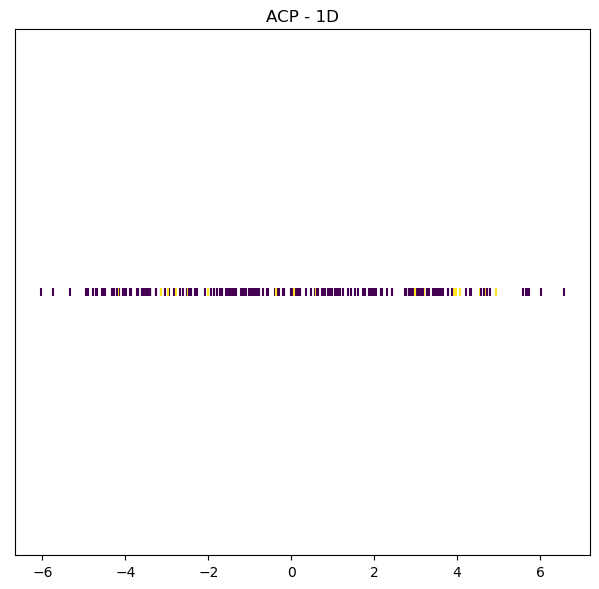

In [124]:
# Réduction de dimension avec ACP
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Visualisation avec ACP
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca, [0] * len(X_pca), c=y, cmap='viridis', marker='|')
plt.title('ACP - 1D')
plt.yticks([])

plt.tight_layout()
plt.show()

In [125]:
# Réduction de dimension avec LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Réduction de dimension avec LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Visualisation avec LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda, [0] * len(X_lda), c=y, cmap='viridis', marker='|')
plt.title('LDA - 1D')
plt.yticks([])

plt.tight_layout()
plt.show()

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).